In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [36]:
data = pd.read_csv("6class.csv")
X = data.loc[:,('Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class')]
X = pd.get_dummies(X, prefix=[ 'Star color', 'Spectral Class'], columns=[ 'Star color', 'Spectral Class'])
y = data['Star type']
print("Label kelas : ", np.unique(y))

Label kelas :  [0 1 2 3 4 5]


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[-0.7793821  -0.59862356 -0.45920992  1.11674535 -0.54524976 -0.06468462
  -0.20851441 -0.11250879 -0.06468462 -0.06468462 -0.3485618  -0.09166985
  -0.06468462 -0.06468462  1.06904497 -0.17332893 -0.06468462 -0.09166985
  -0.06468462 -0.11250879 -0.11250879 -0.18569534 -0.09166985 -0.29321127
  -0.48694291 -0.27610357 -0.06468462 -0.16012815  1.07803625 -0.4472136 ]
 [-0.78210961 -0.59862357 -0.45924053  1.16241376 -0.54524976 -0.06468462
  -0.20851441 -0.11250879 -0.06468462 -0.06468462 -0.3485618  -0.09166985
  -0.06468462 -0.06468462  1.06904497 -0.17332893 -0.06468462 -0.09166985
  -0.06468462 -0.11250879 -0.11250879 -0.18569534 -0.09166985 -0.29321127
  -0.48694291 -0.27610357 -0.06468462 -0.16012815  1.07803625 -0.4472136 ]
 [-0.82847728 -0.59862357 -0.45934168  1.36221308 -0.54524976 -0.06468462
  -0.20851441 -0.11250879 -0.06468462 -0.06468462 -0.3485618  -0.09166985
  -0.06468462 -0.06468462  1.06904497 -0.17332893 -0.06468462 -0.09166985
  -0.06468462 -0.11250879 -0.1125087

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[-0.74119696 -0.59862357 -0.45917116  1.19476222 -0.54524976 -0.06468462
  -0.20851441 -0.11250879 -0.06468462 -0.06468462 -0.3485618  -0.09166985
  -0.06468462 -0.06468462  1.06904497 -0.17332893 -0.06468462 -0.09166985
  -0.06468462 -0.11250879 -0.11250879 -0.18569534 -0.09166985 -0.29321127
  -0.48694291 -0.27610357 -0.06468462 -0.16012815  1.07803625 -0.4472136 ]
 [ 1.24338141 -0.52909304 -0.44721559 -0.76612531 -0.54524976 -0.06468462
  -0.20851441 -0.11250879 -0.06468462 -0.06468462  2.86893172 -0.09166985
  -0.06468462 -0.06468462 -0.93541435 -0.17332893 -0.06468462 -0.09166985
  -0.06468462 -0.11250879 -0.11250879 -0.18569534 -0.09166985 -0.29321127
   2.05362881 -0.27610357 -0.06468462 -0.16012815 -0.92761259 -0.4472136 ]
 [-0.69902545  0.92043697  1.83275324 -1.2922635  -0.54524976 -0.06468462
  -0.20851441 -0.11250879 -0.06468462 -0.06468462 -0.3485618  -0.09166985
  -0.06468462 -0.06468462  1.06904497 -0.17332893 -0.06468462 -0.09166985
  -0.06468462 -0.1125087

In [39]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [41]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

[4 1 3 1 4 4 3 4 3 1 1 2 2 3 5 1 0 5 4 0 4 5 2 0 0 2 0 3 1 4 5 4 2 0 2 5 2
 5 0 3 3 4 3 1 4 1 4 0 5 5 0 3 5 1 2 2 5 3 5 4 1 3 3 5 2 3 0 3 0 1 0 4]


Akurasi : 94.44444444444444 %


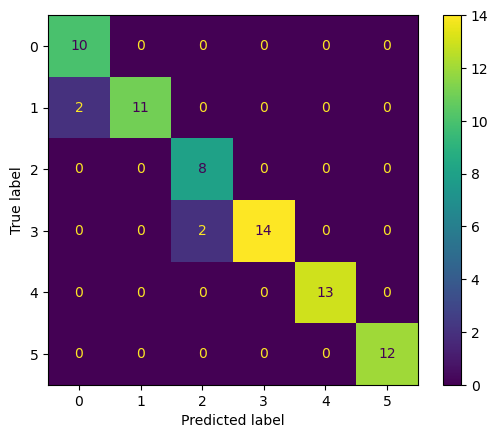

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))